In [3]:
# Q: Have we made this project too much into a DS project?
# Q: Attacking the house recommendation space using different methods in order to investigate which one is the best eg we have decision and random forest to do house rec using same parameters, is this okay? 
# Q: What type of explanations whould we be giving for the models? We would like your advice on this.
# import needed libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [6]:
# load the data
df = pd.read_csv('synthetic_house_recommendation_data.csv')

# What I need to do:
'''
1. Revisit Dropping certain categorical house columns and drop them. 
2. Add more methods of checking accuracy and more graphs 
3. Do LIME for explanation of outcome

Other things:
1. Create Flask backend to accept user input data
2. Pass it to created module functions to output prediction
'''


'\n1. Revisit Dropping certain categorical house columns and drop them. \n2. Add more methods of checking accuracy and more graphs \n3. Do LIME for explanation of outcome\n\nOther things:\n1. Create Flask backend to accept user input data\n2. Pass it to created module functions to output prediction\n'

In [4]:
df2 = pd.read_csv('updated_with_cities.csv')

In [6]:
df2.head()

,Unnamed: 0,latitude,longitude,house_type,price,bedrooms,bathrooms,neighbourhood_quality,house_condition,crime_rate,garden_size,house_keywords,city
0,0,53.108470,-0.411203,Terraced,300890.76,7,3,Alright,Abysmal,Low,17.00,['picture-window' 'rustic' 'unfurnished' 'wild...,Scopwick
1,1,55.854867,-4.279985,Land,272455.06,3,1,Pleasant,Pleasant,Medium,141.83,['septic-tank' 'panoramic-view' 'balcony' 'upc...,Glasgow
2,2,51.523723,-2.500452,Land,172964.52,2,2,Pleasant,Alright,Non Existent,132.38,['driveway' 'workshop' 'mudroom' 'electric-fir...,Winterbourne
3,3,51.759018,-0.245954,Terraced,329183.39,2,1,Alright,Alright,High,4.55,['conservatory' 'loft' 'stylish' 'radon-mitiga...,Hatfield
4,4,50.731135,-3.504734,Terraced,739525.34,3,2,Alright,Alright,Medium,70.97,['furnished' 'window-seat' 'curtains' 'HEPA-fi...,Exeter


In [10]:
# Printing each unique city on a new line
unique_cities = df2['city'].unique()
for city in unique_cities:
    print(city)
    
'''['Scopwick' 'Glasgow' 'Winterbourne' ... "Saint Ann's" 'Wolverley'
 'Brandsby']
'''

Scopwick
Glasgow
Winterbourne
Hatfield
Exeter
Witney
Llansannan
London
Solihull
Ellesmere Port
Iden
Brighton and Hove
Luton
Bristol
Wichenford
Stevenage
Herne Bay
Heckmondwike
Linton-on-Ouse
Doncaster
Crossbush
Cumnor
Southwold
Pontnewynydd
Newport
Birstall
Wigton
Oban
Haselbury Plucknett
Newbiggin-by-the-Sea
Cirencester
West Stret
Eaton Socon
Kettering
Bradford
Chatham
City not found
Darwen
Holmfirth
Walton-on-Thames
Wakefield
Lincoln
Ledbury
South Ockendon
Sebastopol
Ormskirk
Greenford
Bath
Selby
Hughenden Valley
Leicester
Alderley Edge
Worthing
Hampton
Waterloo
Moulton
Wrexham
Douglas
Crowthorne
Sunderland
Bramley
Melksham
Rigside
West End
Northampton
Hamilton
Worcester
Felixstowe
HTTP error: 400
Surbiton
Shurdington
Kingston upon Hull
Ormesby
Oldbury
Winchester
Aberdyfi
Letchworth Garden City
Mickleton
Cramlington
Sherburn Village
Mitcheldean
Plymouth
Marple
Birmingham
Great Bentley
Church Crookham
Ordsall
Chipping Norton
Rogerstone
Newton-le-Willows
Linton
Tynemouth
Lyndhurst
Babi

'[\'Scopwick\' \'Glasgow\' \'Winterbourne\' ... "Saint Ann\'s" \'Wolverley\'\n \'Brandsby\']\n'

In [31]:
df.head()


,Unnamed: 0,latitude,longitude,house_type,price,bedrooms,bathrooms,neighbourhood_quality,house_condition,crime_rate,garden_size,house_keywords
0,0,53.108470,-0.411203,Terraced,300890.76,7,4,Pleasant,Abysmal,High,94.20,"['reception', 'forest-view', 'study-room', 're..."
1,1,55.854867,-4.279985,Land,272455.06,4,3,Pleasant,Alright,Medium,260.42,"['garden', 'laundry-room', 'comfortable', 'saf..."
2,2,51.523723,-2.500452,Land,172964.52,1,3,Pleasant,Alright,Medium,78.91,"['sauna', 'secure', 'recessed-lighting', 'buil..."
3,3,51.759018,-0.245954,Terraced,329183.39,3,1,Alright,Pleasant,Medium,31.37,"['crown-molding', 'greenhouse', 'peaceful', 'l..."
4,4,50.731135,-3.504734,Terraced,739525.34,3,2,Pleasant,Alright,Low,6.00,"['convenient', 'condo', 'water-saving', 'perma..."


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             30000 non-null  int64  
 1   latitude               30000 non-null  object 
 2   longitude              30000 non-null  object 
 3   house_type             30000 non-null  object 
 4   price                  30000 non-null  float64
 5   bedrooms               30000 non-null  int64  
 6   bathrooms              30000 non-null  int64  
 7   neighbourhood_quality  30000 non-null  object 
 8   house_condition        30000 non-null  object 
 9   crime_rate             30000 non-null  object 
 10  garden_size            30000 non-null  float64
 11  house_keywords         30000 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 2.7+ MB


In [33]:
df.describe()

,Unnamed: 0,price,bedrooms,bathrooms,garden_size
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,14999.500000,3.621642e+05,3.005933,2.002233,149.833012
std,8660.398374,2.846226e+05,1.407680,1.008495,393.886377
min,0.000000,1.731773e+04,1.000000,1.000000,0.060000
25%,7499.750000,1.763992e+05,2.000000,1.000000,17.967500
50%,14999.500000,2.841899e+05,3.000000,2.000000,49.200000
75%,22499.250000,4.565909e+05,4.000000,3.000000,135.220000
max,29999.000000,5.318473e+06,10.000000,8.000000,17606.120000


In [34]:
# 
print("Unique values in 'house_type':", df['house_type'].unique())
print('\n')
print("Unique values in 'neighbourhood_quality':", df['neighbourhood_quality'].unique())
print('\n')

print("Unique values in 'house_condition':", df['house_condition'].unique())
print('\n')

print("Unique values in 'crime_rate':", df['crime_rate'].unique())
print('\n')

print("Unique values in 'house_keywords':", df['house_keywords'].unique())
print('\n')


Unique values in 'house_type': ['Terraced' 'Land' 'Semi-Detached' 'Bungalow' 'Detached' 'Flat'
 'Park Home']


Unique values in 'neighbourhood_quality': ['Pleasant' 'Alright' 'Abysmal' 'Outstanding' 'Rough']


Unique values in 'house_condition': ['Abysmal' 'Alright' 'Pleasant' 'Outstanding' 'Rough']


Unique values in 'crime_rate': ['High' 'Medium' 'Low' 'Very Low' 'Very High' 'Non Existent' 'Extreme']


Unique values in 'house_keywords': ["['reception', 'forest-view', 'study-room', 'reverse-osmosis', 'solar-heating', 'laundry-room', 'brick-fireplace', 'backup-generator', 'damp-proof', 'safe', 'dog-run', 'carbon-monoxide-detectors', 'historic', 'rain-barrel', 'water-saving', 'earthquake-resistant', 'birdhouse', 'earthquake-resistant', 'catio', 'basement', 'sustainable', 'ecosystem-friendly', 'filtration-system', 'terrace', 'electric-stove', 'welcoming', 'utility-room', 'thermal-insulation', 'estate', 'soundproof', 'rustic', 'wainscoting', 'passive-house', 'vintage-style', 'classic', 'h

In [35]:
# deal with missing values in the dataset:
# check for missing values in the dataset
print("Missing values in the dataset:", df.isnull().sum())

Missing values in the dataset: Unnamed: 0               0
latitude                 0
longitude                0
house_type               0
price                    0
bedrooms                 0
bathrooms                0
neighbourhood_quality    0
house_condition          0
crime_rate               0
garden_size              0
house_keywords           0
dtype: int64


In [36]:
# Assuming 'df' is your DataFrame
# Columns to be one-hot encoded
# maybe revisit this and make like Aileen's 
categorical_columns = ['house_type', 'neighbourhood_quality', 'house_condition', 'crime_rate']

# Set up OneHotEncoder and ColumnTransformer
encoder = OneHotEncoder()
transformer = ColumnTransformer([
    ("one_hot", encoder, categorical_columns)
], remainder='passthrough')

# Apply encoder to the data
df_encoded_array = transformer.fit_transform(df)

# Accessing categories from the fitted transformer
# Get the encoder and then the categories
fitted_encoder = transformer.named_transformers_['one_hot']
categories = fitted_encoder.categories_

# Creating a flat list of new column names for the categorical variables
category_mapping = [f"{cat}__{subcat}" for cat, sublist in zip(categorical_columns, categories) for subcat in sublist]

# Get names of columns that were not transformed (passthrough)
passthrough_indices = [i for i, col in enumerate(df.columns) if col not in categorical_columns]
passthrough_columns = [df.columns[i] for i in passthrough_indices]

# Combine all column names
all_columns = category_mapping + passthrough_columns

# Create the DataFrame with the appropriate column names
df_encoded = pd.DataFrame(df_encoded_array, columns=all_columns)  # Ensure to convert sparse matrix to array

# Check the first few rows of the encoded DataFrame
print(df_encoded.head())

  house_type__Bungalow house_type__Detached house_type__Flat house_type__Land  \
0                  0.0                  0.0              0.0              0.0   
1                  0.0                  0.0              0.0              1.0   
2                  0.0                  0.0              0.0              1.0   
3                  0.0                  0.0              0.0              0.0   
4                  0.0                  0.0              0.0              0.0   

  house_type__Park Home house_type__Semi-Detached house_type__Terraced  \
0                   0.0                       0.0                  1.0   
1                   0.0                       0.0                  0.0   
2                   0.0                       0.0                  0.0   
3                   0.0                       0.0                  1.0   
4                   0.0                       0.0                  1.0   

  neighbourhood_quality__Abysmal neighbourhood_quality__Alright  \
0

In [44]:
df_encoded.info()
df_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   house_type__Bungalow                30000 non-null  object 
 1   house_type__Detached                30000 non-null  object 
 2   house_type__Flat                    30000 non-null  object 
 3   house_type__Land                    30000 non-null  object 
 4   house_type__Park Home               30000 non-null  object 
 5   house_type__Semi-Detached           30000 non-null  object 
 6   house_type__Terraced                30000 non-null  object 
 7   neighbourhood_quality__Abysmal      30000 non-null  object 
 8   neighbourhood_quality__Alright      30000 non-null  object 
 9   neighbourhood_quality__Outstanding  30000 non-null  object 
 10  neighbourhood_quality__Pleasant     30000 non-null  object 
 11  neighbourhood_quality__Rough        30000

,house_type__Bungalow,house_type__Detached,house_type__Flat,house_type__Land,house_type__Park Home,house_type__Semi-Detached,house_type__Terraced,neighbourhood_quality__Abysmal,neighbourhood_quality__Alright,neighbourhood_quality__Outstanding,...,crime_rate__Very Low,Unnamed: 0,latitude,longitude,price,bedrooms,bathrooms,garden_size,house_keywords,log_price
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0,53.108470,-0.411203,300890.76,7,4,94.2,"['reception', 'forest-view', 'study-room', 're...",12.614506
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,55.854867,-4.279985,272455.06,4,3,260.42,"['garden', 'laundry-room', 'comfortable', 'saf...",12.515233
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2,51.523723,-2.500452,172964.52,1,3,78.91,"['sauna', 'secure', 'recessed-lighting', 'buil...",12.060848
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,3,51.759018,-0.245954,329183.39,3,1,31.37,"['crown-molding', 'greenhouse', 'peaceful', 'l...",12.704373
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,4,50.731135,-3.504734,739525.34,3,2,6.0,"['convenient', 'condo', 'water-saving', 'perma...",13.513765


OptionError: No such keys(s): 'mode.use_inf_as_null'

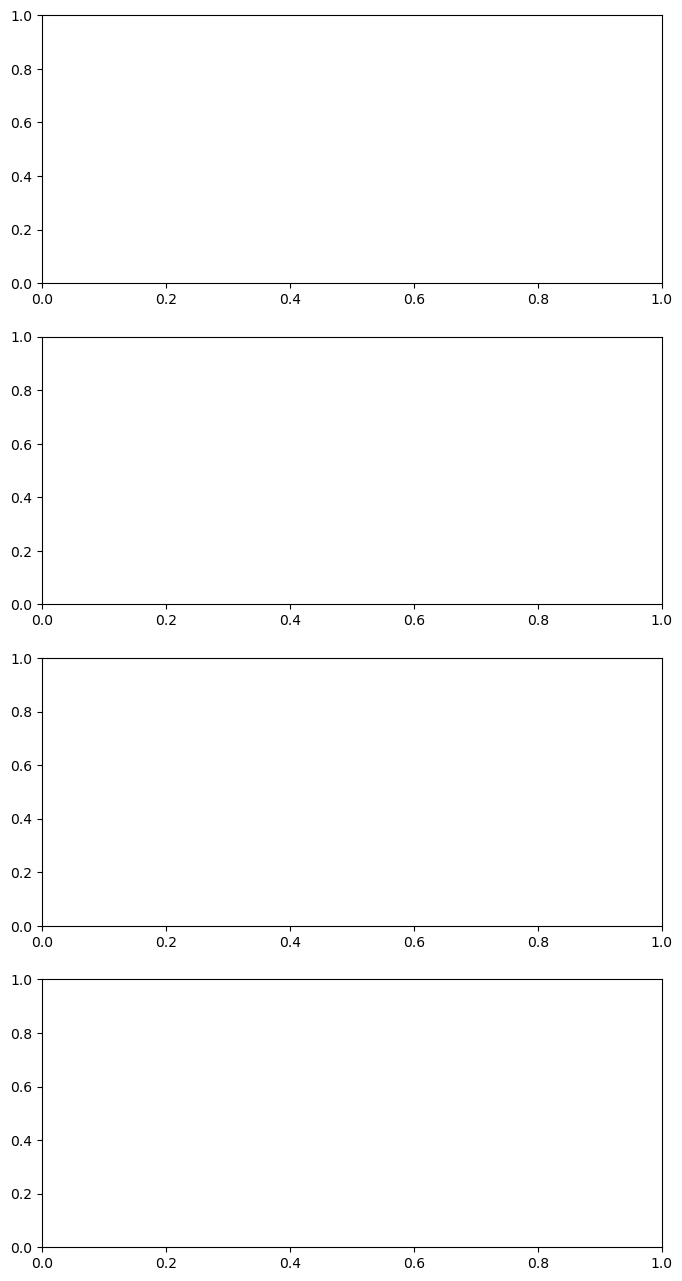

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df_encoded' is your DataFrame and already loaded
numerical_features = ['price', 'bedrooms', 'bathrooms', 'garden_size']

# Sample a subset of the data, say 10% of it
sample_df = df_encoded.sample(frac=0.1)

# # Plotting distributions of numerical features on the sample
# fig, axes = plt.subplots(len(numerical_features), 1, figsize=(8, 4 * len(numerical_features)))
# if len(numerical_features) == 1:
#     axes = [axes]  # Make sure 'axes' is always a list of axes, even when there is only one subplot
# for i, feature in enumerate(numerical_features):
#     sns.histplot(sample_df[feature], kde=True, ax=axes[i])
#     axes[i].set_title(f'Distribution of {feature}')
#     axes[i].set_ylabel('Frequency')

# plt.tight_layout()
# plt.show()


In [43]:

# Log-transform the 'price' column
# Assuming 'df' is your DataFrame that includes the 'price' column.
df_encoded['log_price'] = np.log1p(df['price'])

# # Now you can visualize the distribution of the log-transformed price.
# plt.histplot(df['log_price'], kde=True)
# plt.title('Distribution of Log-transformed Price')
# plt.xlabel('Log(Price)')
# plt.ylabel('Frequency')
# plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'histplot'

/tmp/ipykernel_704608/1639966214.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded['garden_size'] = df_encoded['garden_size'].replace([np.inf, -np.inf], np.nan).fillna(0)


OptionError: No such keys(s): 'mode.use_inf_as_null'

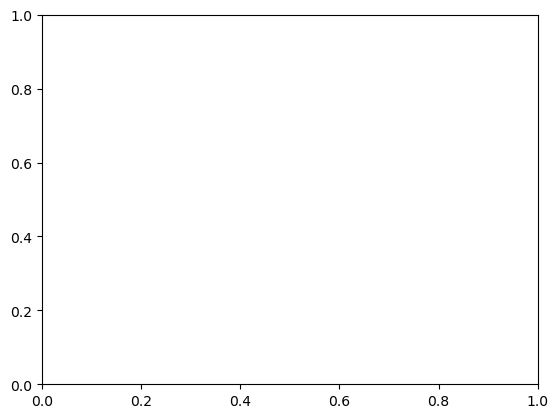

In [45]:
# transform the garden size because of extreme right skewness!
# Visualizing the distribution of the log-transformed garden size
df_encoded['garden_size'] = df_encoded['garden_size'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Now apply the log1p transformation
df_encoded['log_garden_size'] = np.log1p(df_encoded['garden_size'])

# Visualize the distribution of the log-transformed garden size
sns.histplot(df_encoded['log_garden_size'], kde=True)
plt.title('Distribution of Log-transformed Garden Size')
plt.xlabel('Log(Garden Size)')
plt.ylabel('Frequency')
plt.show()


In [46]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   house_type__Bungalow                30000 non-null  object 
 1   house_type__Detached                30000 non-null  object 
 2   house_type__Flat                    30000 non-null  object 
 3   house_type__Land                    30000 non-null  object 
 4   house_type__Park Home               30000 non-null  object 
 5   house_type__Semi-Detached           30000 non-null  object 
 6   house_type__Terraced                30000 non-null  object 
 7   neighbourhood_quality__Abysmal      30000 non-null  object 
 8   neighbourhood_quality__Alright      30000 non-null  object 
 9   neighbourhood_quality__Outstanding  30000 non-null  object 
 10  neighbourhood_quality__Pleasant     30000 non-null  object 
 11  neighbourhood_quality__Rough        30000

In [ ]:


# Ensure the target variable 'log_price' is also correctly typed
# df_encoded['log_price'] = pd.to_numeric(df['log_price'], errors='coerce')
# df_encoded['log_price'] = pd.to_numeric(df_encoded['log_price'])
# Convert 'log_price' to numeric, coercing errors to NaN
df_encoded['log_price'] = pd.to_numeric(df_encoded['log_price'], errors='coerce')

# Optionally handle NaN values by replacing them with the mean or median
df_encoded['log_price'].fillna(df_encoded['log_price'].mean(), inplace=True)


In [ ]:
# List of columns that are known to be binary (one-hot encoded)
binary_columns = [
    'house_type__Bungalow', 'house_type__Detached', 'house_type__Flat', 'house_type__Land', 
    'house_type__Park Home', 'house_type__Semi-Detached', 'house_type__Terraced',
    'neighbourhood_quality__Abysmal', 'neighbourhood_quality__Alright', 
    'neighbourhood_quality__Outstanding', 'neighbourhood_quality__Pleasant', 
    'neighbourhood_quality__Rough', 'house_condition__Abysmal', 'house_condition__Alright', 
    'house_condition__Outstanding', 'house_condition__Pleasant', 'house_condition__Rough', 
    'crime_rate__Extreme', 'crime_rate__High', 'crime_rate__Low', 'crime_rate__Medium', 
    'crime_rate__Non Existent', 'crime_rate__Very High', 'crime_rate__Very Low'
]

# Convert these columns explicitly to integer
for col in binary_columns:
    df_encoded[col] = df_encoded[col].astype(int)

# Verify changes
print(df_encoded[binary_columns].dtypes)


house_type__Bungalow                  int64
house_type__Detached                  int64
house_type__Flat                      int64
house_type__Land                      int64
house_type__Park Home                 int64
house_type__Semi-Detached             int64
house_type__Terraced                  int64
neighbourhood_quality__Abysmal        int64
neighbourhood_quality__Alright        int64
neighbourhood_quality__Outstanding    int64
neighbourhood_quality__Pleasant       int64
neighbourhood_quality__Rough          int64
house_condition__Abysmal              int64
house_condition__Alright              int64
house_condition__Outstanding          int64
house_condition__Pleasant             int64
house_condition__Rough                int64
crime_rate__Extreme                   int64
crime_rate__High                      int64
crime_rate__Low                       int64
crime_rate__Medium                    int64
crime_rate__Non Existent              int64
crime_rate__Very High           

In [ ]:
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   house_type__Bungalow                30000 non-null  int64  
 1   house_type__Detached                30000 non-null  int64  
 2   house_type__Flat                    30000 non-null  int64  
 3   house_type__Land                    30000 non-null  int64  
 4   house_type__Park Home               30000 non-null  int64  
 5   house_type__Semi-Detached           30000 non-null  int64  
 6   house_type__Terraced                30000 non-null  int64  
 7   neighbourhood_quality__Abysmal      30000 non-null  int64  
 8   neighbourhood_quality__Alright      30000 non-null  int64  
 9   neighbourhood_quality__Outstanding  30000 non-null  int64  
 10  neighbourhood_quality__Pleasant     30000 non-null  int64  
 11  neighbourhood_quality__Rough        30000

In [74]:
# switch 
df['has_garden'] = (df['garden_size'] > 0).astype(int)

In [75]:
# Handling other non-numeric columns if they still exist
remaining_object_columns = df_encoded.select_dtypes(include=['object']).columns
print("Remaining object columns:", remaining_object_columns)

# drop some unncessary cilumns for the model
df_encoded.drop(columns=['Unnamed: 0'], inplace=True)
#df_encoded.drop(columns=['price'], inplace=True)
df_encoded.drop(columns=['house_keywords'], inplace=True)
df_encoded.drop(columns=['garden_size'], inplace=True)
df_encoded.drop(columns=['log_garden_size'], inplace=True)

# df_encoded.drop(columns=['latitude'], inplace=True)







# # You might need to convert other columns like 'price', 'latitude', 'longitude' to numeric types
# df_encoded['price'] = pd.to_numeric(df_encoded['price'], errors='coerce')
# df_encoded['latitude'] = pd.to_numeric(df_encoded['latitude'], errors='coerce')
# df_encoded['longitude'] = pd.to_numeric(df_encoded['longitude'], errors='coerce')

# # Fill NaN values if necessary
# df_encoded.fillna(df_encoded.mean(), inplace=True)


Remaining object columns: Index([], dtype='object')
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/usr/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_704608/63312831.py", line 6, in <module>
    df_encoded.drop(columns=['Unnamed: 0'], inplace=True)
  File "/home/accts/vmb42/.local/lib/python3.11/site-packages/pandas/core/frame.py", line 5568, in drop
    falcon  speed   320.0
           ^^^^^^^^^^^^^^
  File "/home/accts/vmb42/.local/lib/python3.11/site-packages/pandas/core/generic.py", line 4785, in drop
  File "/home/accts/vmb42/.local/lib/python3.11/site-packages/pandas/core/generic.py", line 4827, in _drop_axis
    raise AssertionError("axis must be a MultiIndex")
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/accts/vmb42/.local/lib/python3.11/site-packages/pandas/core/indexes/base.py", line 7070, in drop
    raise KeyError(f"{labels[mask].tolist()} not found in axis")
KeyError: "['Unnamed: 0'] not found in ax

In [76]:
remaining_object_columns = df_encoded.select_dtypes(include=['object']).columns
print("Remaining object columns:", remaining_object_columns)
df_encoded['bathrooms'] = pd.to_numeric(df_encoded['bathrooms'], errors='coerce')
df_encoded['bedrooms'] = pd.to_numeric(df_encoded['bedrooms'], errors='coerce')
df_encoded['latitude'] = pd.to_numeric(df_encoded['latitude'], errors='coerce')
df_encoded['longitude'] = pd.to_numeric(df_encoded['longitude'], errors='coerce')

df_encoded.fillna(df_encoded.mean(), inplace=True)


Remaining object columns: Index([], dtype='object')


In [77]:
df_encoded.head()

,house_type__Bungalow,house_type__Detached,house_type__Flat,house_type__Land,house_type__Park Home,house_type__Semi-Detached,house_type__Terraced,neighbourhood_quality__Abysmal,neighbourhood_quality__Alright,neighbourhood_quality__Outstanding,...,crime_rate__Low,crime_rate__Medium,crime_rate__Non Existent,crime_rate__Very High,crime_rate__Very Low,latitude,longitude,bedrooms,bathrooms,log_price
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,53.108470,-0.411203,7,4,12.614506
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,55.854867,-4.279985,4,3,12.515233
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,51.523723,-2.500452,1,3,12.060848
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,51.759018,-0.245954,3,1,12.704373
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,50.731135,-3.504734,3,2,13.513765


In [50]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   house_type__Bungalow                30000 non-null  float64
 1   house_type__Detached                30000 non-null  float64
 2   house_type__Flat                    30000 non-null  float64
 3   house_type__Land                    30000 non-null  float64
 4   house_type__Park Home               30000 non-null  float64
 5   house_type__Semi-Detached           30000 non-null  float64
 6   house_type__Terraced                30000 non-null  float64
 7   neighbourhood_quality__Abysmal      30000 non-null  float64
 8   neighbourhood_quality__Alright      30000 non-null  float64
 9   neighbourhood_quality__Outstanding  30000 non-null  float64
 10  neighbourhood_quality__Pleasant     30000 non-null  float64
 11  neighbourhood_quality__Rough        30000

In [ ]:
df_encoded[log_price]

In [69]:
# Define the features and target variable
X = df_encoded.drop(columns=['log_price'], axis=1)
y = df_encoded['log_price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [70]:
# Create the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)


In [71]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.5117694230120718


RMSE in log scale: 0.714142842854285
Average price error factor: 2.0424352437729247


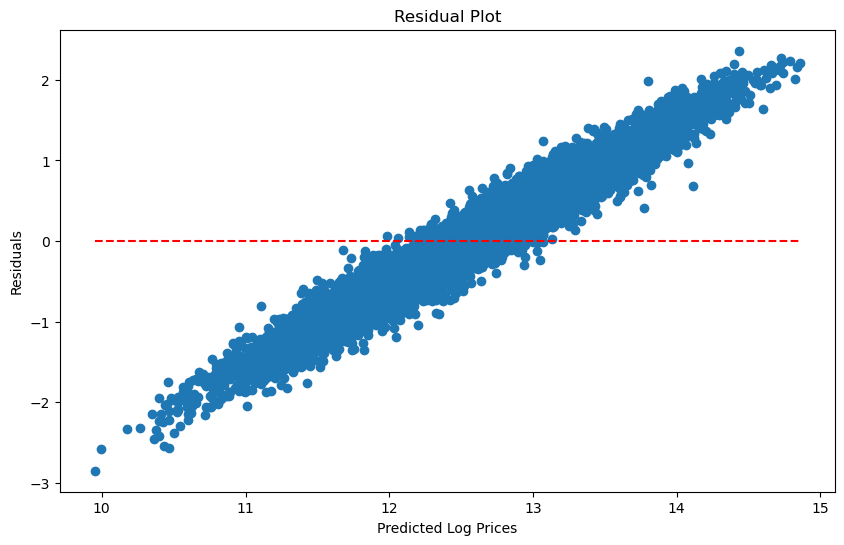

Text(0.5, 1.0, 'Top 10 Important Features')

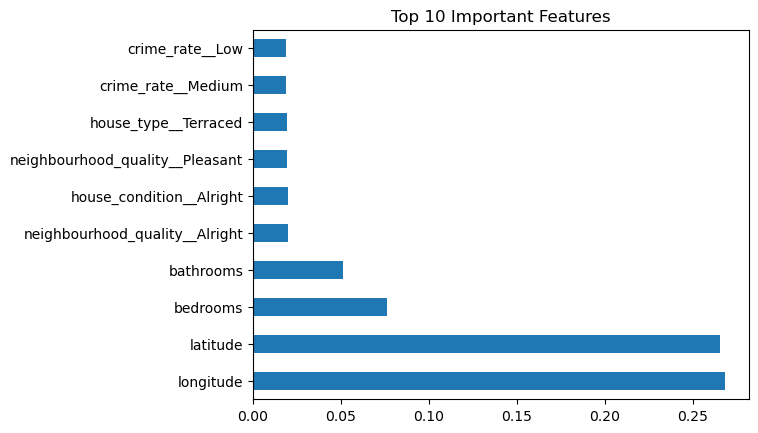

In [73]:
# Calculate RMSE in log scale
RMSE_log = np.sqrt(0.51)
print(f'RMSE in log scale: {RMSE_log}')

# Convert RMSE from log scale to original scale to understand average error
average_price_error = np.exp(RMSE_log)
print(f'Average price error factor: {average_price_error}')

# Residuals plot
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), colors='red', linestyles='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Log Prices')
plt.ylabel('Residuals')
plt.show()

# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')


In [ ]:
# Cross Validation Analysis
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())


Cross-validation scores: [-0.03712206 -0.03820321 -0.03904226 -0.03537257 -0.0332106 ]
Average cross-validation score: -0.036590138135151884


In [79]:
# User input
user_input1 = {
    'house_type__Detached': 1,
    'house_type__Bungalow': 0,
    'house_type__Flat': 0,
    'house_type__Land': 0,
    'house_type__Park Home': 0,
    'house_type__Semi-Detached': 0,
    'house_type__Terraced': 0,
    'neighbourhood_quality__Outstanding': 1,
    'neighbourhood_quality__Abysmal': 0,
    'neighbourhood_quality__Alright': 0,
    'neighbourhood_quality__Pleasant': 0,
    'neighbourhood_quality__Rough': 0,
    'house_condition__Outstanding': 1,
    'house_condition__Abysmal': 0,
    'house_condition__Alright': 0,
    'house_condition__Pleasant': 0,
    'house_condition__Rough': 0,
    'crime_rate__Low': 1,
    'crime_rate__Extreme': 0,
    'crime_rate__High': 0,
    'crime_rate__Medium': 0,
    'crime_rate__Non Existent': 0,
    'crime_rate__Very High': 0,
    'crime_rate__Very Low': 0,
    'bedrooms': 3,
    'bathrooms': 2,
    'latitude': 40.7128,  # Example placeholder value
    'longitude': -74.0060,  # Example placeholder value
    'log_garden_size': np.log(500)  # Calculated log value from user input
}

# Convert user input to DataFrame
input_df = pd.DataFrame([user_input1])
input_df = input_df[X_train.columns]  # Ensure column order matches the training data

# Make a prediction
predicted_log_price = model.predict(input_df)
predicted_price = np.exp(predicted_log_price[0])

print(f'Predicted Price: ${predicted_price:.2f}')

Predicted Price: $146218.02
